### Random Forest Algo:-
It is the supervised machine learning algorithm which is for classification and 
Regression module 
It is based on ensemble learning
Deffination:-"Random Forest is a classifier that contains a number of decision trees on various subsets of the given dataset and takes the average to improve the predictive accuracy of that dataset.
The greater number of trees in the forest leads to higher accuracy and prevents the problem of overfitting.
"

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
import pickle
import sklearn
import joblib

# from sklearn.preprocessing import OneHotEncoder
# from sklearn.compose import ColumnTransformer

In [2]:
data=pd.read_csv('data.csv')
data.head()

,a,scheme_name,min_sip,min_lumpsum,expense_ratio,fund_size_cr,fund_age_yr,fund_manager,sortino,alpha,...,beta,sharpe,risk_level,amc_name,rating,category,sub_category,returns_1yr,returns_3yr,returns_5yr
0,0,Aditya Birla SL Active Debt Multi-Mgr FoF-Dir ...,100,100,0.27,10.0,10,Kaustubh Gupta,0.32,2.24,...,0.01,0.24,3,Aditya Birla Sun Life Mutual Fund,3,Other,FoFs Domestic,4.0,6.5,6.900000
1,1,Aditya Birla SL Arbitrage Fund,1000,1000,0.36,4288.0,10,Lovelish Solanki,1.33,1.53,...,0.56,1.10,1,Aditya Birla Sun Life Mutual Fund,3,Hybrid,Arbitrage Mutual Funds,5.6,4.8,5.500000
2,2,Aditya Birla SL Asset Allocator FoF-Dir Growth,1000,1000,0.53,157.0,10,Vinod Narayan Bhat,3.44,2.67,...,0.67,1.42,5,Aditya Birla Sun Life Mutual Fund,3,Other,FoFs Domestic,2.0,18.9,9.700000
3,3,Aditya Birla SL Bal Bhavishya Yojna â€“ Dir Gr...,500,1000,0.76,637.0,4,Atul Penkar,2.18,-6.37,...,0.85,0.90,6,Aditya Birla Sun Life Mutual Fund,2,Solution Oriented,Childrens Funds,-0.7,17.1,9.747059
4,4,Aditya Birla SL Balanced Advantage Fund,100,100,0.61,6386.0,10,Mohit Sharma,3.69,1.99,...,0.68,1.39,6,Aditya Birla Sun Life Mutual Fund,4,Hybrid,Dynamic Asset Allocation or Balanced Advantage,4.5,18.6,9.700000


In [3]:
data.columns

Index(['a', 'scheme_name', 'min_sip', 'min_lumpsum', 'expense_ratio',
       'fund_size_cr', 'fund_age_yr', 'fund_manager', 'sortino', 'alpha', 'sd',
       'beta', 'sharpe', 'risk_level', 'amc_name', 'rating', 'category',
       'sub_category', 'returns_1yr', 'returns_3yr', 'returns_5yr'],
      dtype='object')

In [4]:
data.shape
data.info
data.size

17094

In [5]:
# # data.drop(columns=['a'],axis=1,inplace=True)
# sns.heatmap(data.corr(),annot=True)
# data.corr()

### From above information some columns have a strongly correlation  with the risk_level column. these columns are 
### 1) sd 2)sortino 3)returns_3yr 4)sharpe 5)expense_ratio
### so we use expense_ratio as target_column

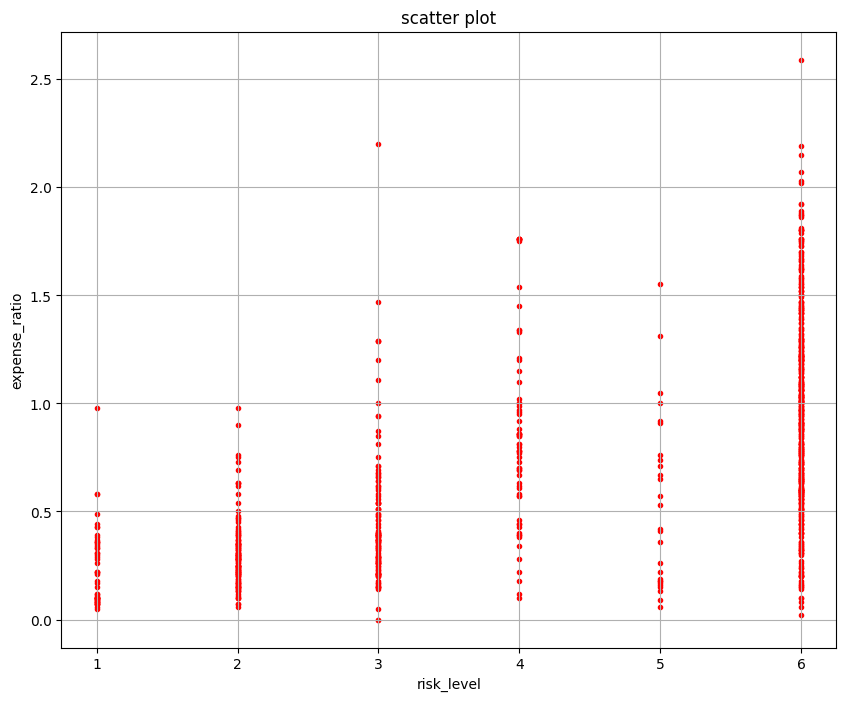

In [6]:
plt.figure(figsize=(10,8))
plt.scatter(data['risk_level'],data['expense_ratio'],marker='.',color='red')
plt.grid()
plt.xlabel('risk_level')
plt.ylabel('expense_ratio')
plt.title('scatter plot')
plt.show()

### when we uses Random Forest , it is not  neccessary to convert categorical datatype columns  into the numerical datatype columns but we doing this covertation for better accurcy .so we are   doing converting datatypes.

### Convert categorical columns to numerical using LabelEncoder or One-Hot Encoding

In [7]:
label_encoder = LabelEncoder()
data['scheme_name']=label_encoder.fit_transform(data['scheme_name'])
data['fund_manager']=label_encoder.fit_transform(data['fund_manager'])
data['amc_name']=label_encoder.fit_transform(data['amc_name'])
data['category']=label_encoder.fit_transform(data['category'])
data['sub_category']=label_encoder.fit_transform(data['sub_category'])
# One-hot encode categorical columns
# ct = ColumnTransformer([('one_hot_encoder', OneHotEncoder(), categorical_columns)], remainder='passthrough')
# X_encoded = ct.fit_transform(data)
# categorical_columns = ['category', 'sub_category', 'amc_name', 'fund_manager']


### scale numerical columns

In [8]:
scaler=StandardScaler()
numerical_columns=['min_sip', 'min_lumpsum', 'expense_ratio', 'fund_size_cr', 'fund_age_yr',
                     'sortino', 'alpha', 'sd', 'beta', 'sharpe', 'risk_level', 'rating',
                     'returns_1yr', 'returns_3yr', 'returns_5yr']
data[numerical_columns]=scaler.fit_transform(data[numerical_columns])

In [9]:
# Independent variable
X=data.drop(columns=['expense_ratio'])#feature
y=data['expense_ratio']#target

### training and Testing Data

In [10]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

#651 X 21
X_train.shape
#(163 X 21) 
X_test.shape
# 651 X 1
y_train.shape
#163 X 1
y_test.shape

(163,)

In [11]:
classifier = RandomForestRegressor(random_state=42)
classifier.fit(X_train,y_train)

RandomForestRegressor(random_state=42)

In [12]:
y_prediction=classifier.predict(X_test)
y_prediction

array([ 0.18899286, -0.60210011, -0.63011626,  0.21327352, -0.74923676,
       -0.89139276,  0.42827151,  0.67813403,  0.09581323,  0.61629098,
       -0.85818844,  0.27490904, -0.73948299,  0.74661794, -0.88890244,
        2.44315127,  1.1035644 , -0.60313774,  0.67128564,  0.77504914,
       -1.31142744,  0.1800692 ,  0.15973155,  0.8377223 ,  0.75886204,
        1.21376125, -1.02026704,  0.10909496, -0.77621527, -0.78119592,
        1.43913558,  0.96389873,  1.23555158,  0.60321678,  0.50049091,
        1.22662792,  0.76591796,  0.51481027, -0.66124531,  0.09083258,
       -0.44188926, -0.08245247,  1.05811599,  1.04296652, -0.73138944,
       -0.1909891 ,  0.26723055,  1.19300855, -1.01777672,  0.73976955,
        0.33177145, -0.88163899, -0.63405927, -0.1864235 , -0.78347872,
       -1.13233163,  0.28549292, -0.66850875, -0.72454105, -1.02877565,
        0.41415967,  0.55631567, -0.98685519,  0.75927709, -1.29980592,
       -0.34725694, -0.12665572, -0.39187525, -1.28382634,  0.55

In [13]:
mse = mean_squared_error(y_test, y_prediction)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.4701947369114593


In [15]:
joblib.dump(classifier,'model.pkl')

['model.pkl']

In [ ]:
import pandas as pd 
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score, classification_report
from sklearn.impute import SimpleImputer
import joblib

# Read the data
data = pd.read_csv('data.csv')

# Check for missing values
print(data.isnull().sum())

# Define features and targets
features = ['min_sip','min_lumpsum','expense_ratio','fund_size_cr','fund_age_yr','sortino','alpha','sd','sharpe','beta']
targets = ['category','sub_category','scheme_name','amc_name']

# Encode target variables
label_encoders = {}
for target in targets:
    le = LabelEncoder()
    data[target] = le.fit_transform(data[target])
    label_encoders[target]=le

joblib.dump(label_encoders, 'label_encoders.pkl')
    

# Separate features and targets
X = data[features]
y = data[targets]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Concatenate target variables into a single DataFrame
# y_concatenated_train = pd.concat([y_train[col] for col in targets], axis=1)
# y_concatenated_test = pd.concat([y_test[col] for col in targets], axis=1)

# Initialize and train theRandomForestClassifier

imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)
classifier = RandomForestClassifier(random_state=42)
classifier.fit(X_train_imputed, y_train)

# Make predictions
y_prediction = classifier.predict(X_test_imputed)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_prediction)
print("Mean Squared Error:", mse)

for i, target in enumerate(targets):
    print(f"Classification report for {target}:")
    print(classification_report(y_test[target], y_prediction[:, i]))
# Save the trained model
joblib.dump(classifier, 'model.pkl')
